In [8]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [9]:
# reading the data

kmeans_data=pd.read_csv(r'./csv_files/Mall_Customers.csv')

In [11]:
#displaying the data

kmeans_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
#finding the shape

kmeans_data.shape

(200, 5)

In [14]:
# finding the descriptive statistics 

kmeans_data.describe().round(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [16]:
# finding the meta data 

kmeans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
# columns name

kmeans_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [19]:
# checking for null values

kmeans_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
# checking the percentage of missing value

kmeans_data.isnull().sum()/len(kmeans_data)

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [38]:
# renaming the few column names

kmeans_data.columns=['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score']

In [40]:
kmeans_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

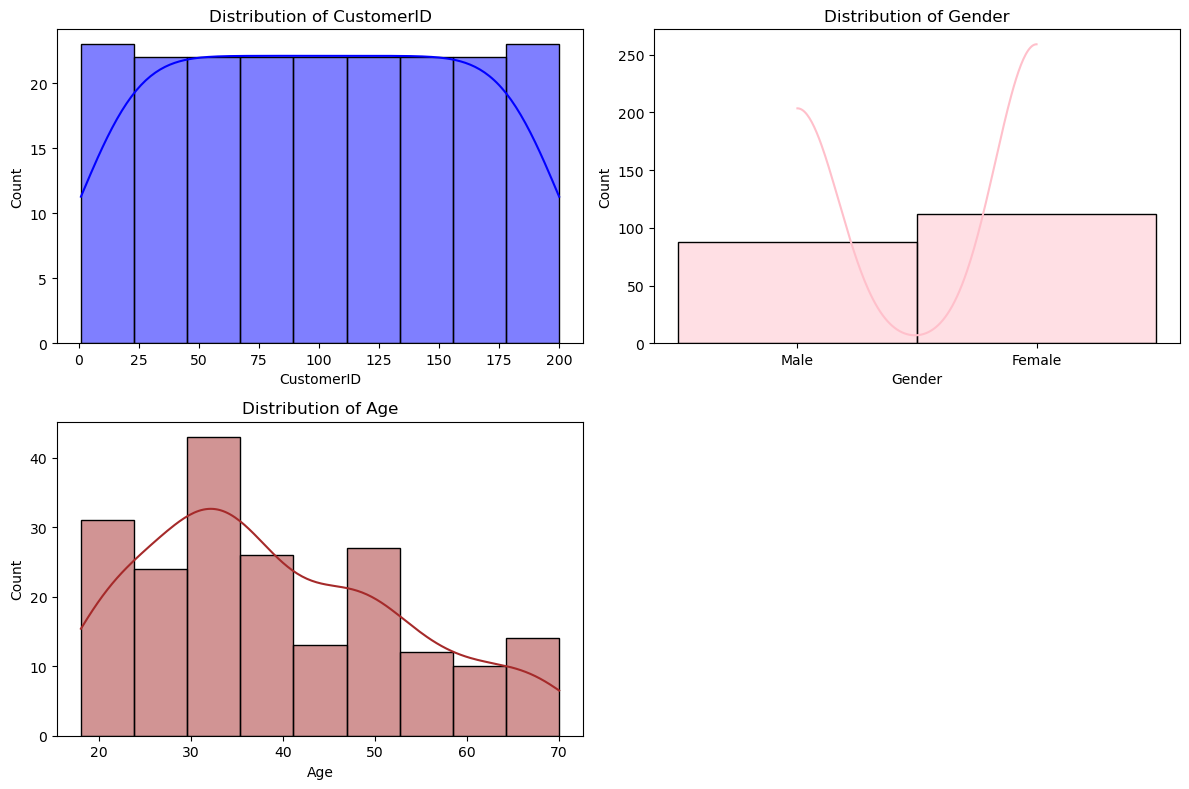

In [41]:
# finding the distribution of the data which describes the:
# 1) how much features data points have distributed or spread in data(checks the normal (GAUSSIAN) distribution)
# 2) skeweness in the data points
# 3) we can identify the outliers using the distribution

colors = ['red','blue', 'pink', 'brown', 'cyan']
plt.figure(figsize=(12,8))
for i, column in enumerate(kmeans_data.columns[:-2],1): # we are taking the each features from dataset excluding last two feature and this are itreable 
    plt.subplot(2,2,i)  # creating the sub plot that will display the each features of dataset
    sns.histplot(kmeans_data[column],kde=True, color=colors[i % len(colors)]) # creating the histogram and kernal distribution estimation smoothen on datapoints
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
plt.show()

In [45]:
# We are going to use annual income and spending score to find the clusters in data

cluster_1=kmeans_data['Annual Income']
cluster_2=kmeans_data['Spending Score']

Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

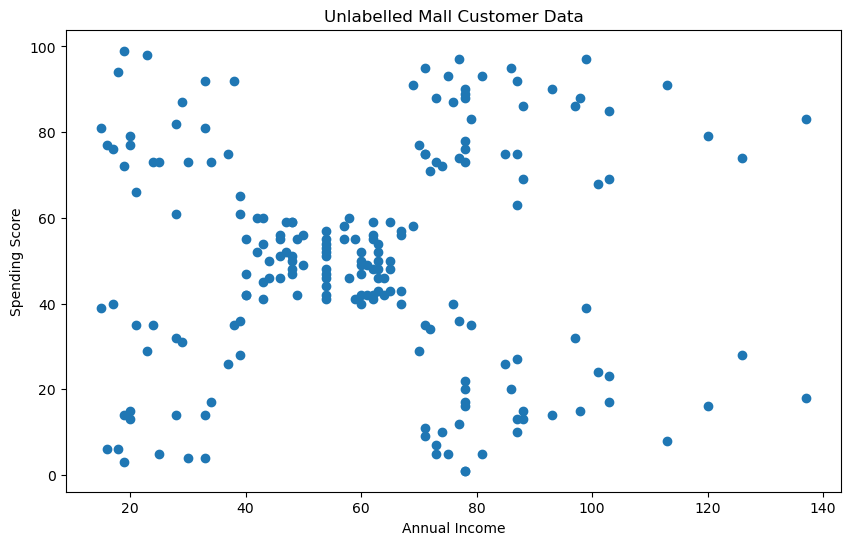

In [47]:
# creating the scatter plot for displaying the data

plt.figure(figsize=(10,6))
plt.scatter(kmeans_data['Annual Income'],kmeans_data['Spending Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')

In [50]:
# since we are going to use Annual Income and Spending Score  columns only, lets create 2D array of these columns for further use


X = kmeans_data.iloc[:, [3,4]].values
X[:5] # Show first 5 records only

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

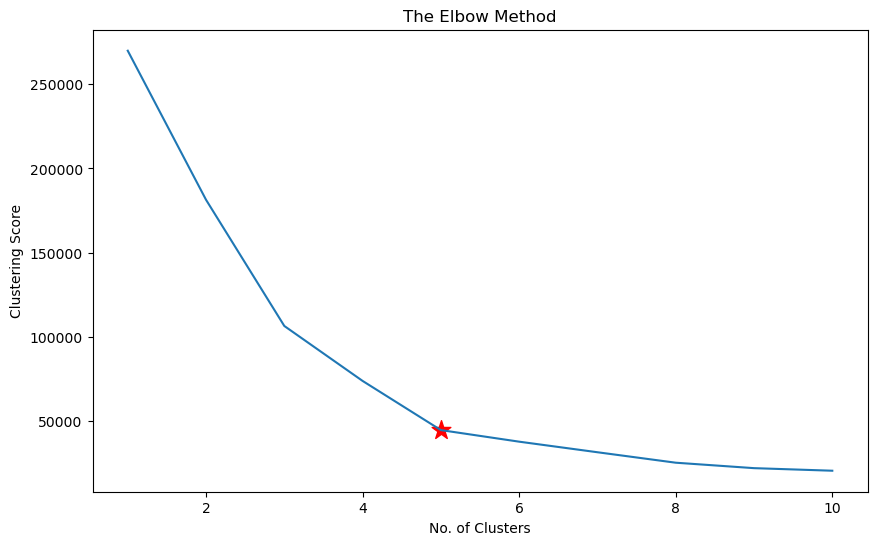

In [51]:
# now we will choose the number of clusters by usung ELBOW METHOD

clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) 
# inertia_ = Sum of squared distances of samples to their closest cluster center(WCSS).
# WCSS = within cluster sum of square
# formula for WCSS = sum of square root of distance between points to the nearest centroid


plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [52]:
# now we will select the model
# here the number of cluster is 5 because we have used the ELBOW METHOD that finds the number of clusters


kmeans_model=KMeans(n_clusters=5,random_state=42)
kmeans_model

KMeans(n_clusters=5, random_state=42)

In [54]:
# now fitting the data into model

kmeans_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [56]:
# the prediction points are

predicted_data = kmeans_model.predict(X)
predicted_data

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [59]:
# Adding the cluster column which will contains the value for each training examples


kmeans_data['Cluster'] = pd.DataFrame(predicted_data, columns=['cluster'] )
print('Number of data points in each cluster= \n', kmeans_data['Cluster'].value_counts())

Number of data points in each cluster= 
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [60]:
kmeans_data

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


Text(0.5, 1.0, 'Customer Clusters')

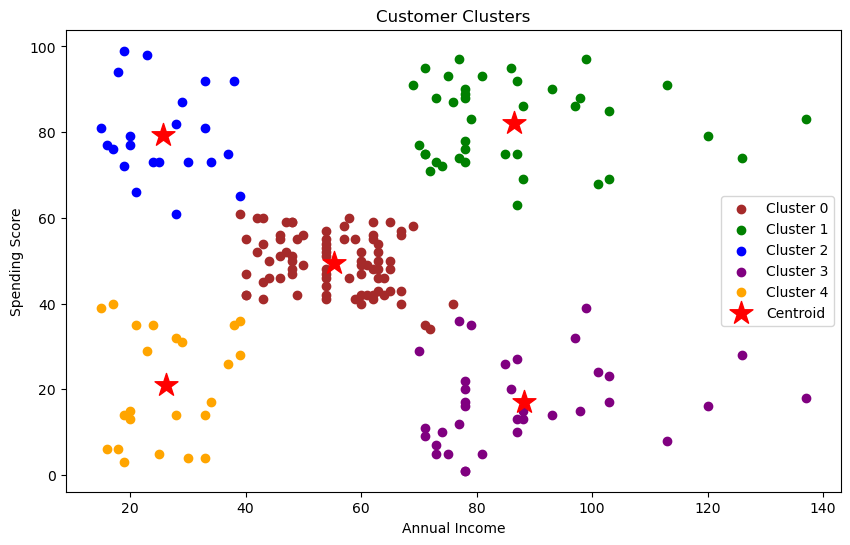

In [62]:
# ploting the centroid and cluster with different colors to visualize

plt.figure(figsize=(10,6))
plt.scatter(X[predicted_data == 0, 0], X[predicted_data == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[predicted_data == 1, 0], X[predicted_data == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[predicted_data == 2, 0], X[predicted_data == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[predicted_data == 3, 0], X[predicted_data == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[predicted_data == 4, 0], X[predicted_data == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

In [63]:
# displaying the cluster centers

print("Cluster Centers: \n", kmeans_model.cluster_centers_)

Cluster Centers: 
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [65]:
#Checking the inertia (sum of squared distances of samples to their closest cluster center)

print(f"Inertia: {kmeans_model.inertia_}")

Inertia: 44448.45544793371
